# Bank Client Churn

Build an Artificial Neural Network to identify the customers who will be leaving the 
bank, based on the data of all customers over the past three months. 

## Section 1

In [132]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

import tensorflow as tf

import tensorboard as tb

layers = tf.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


### Load the dataset

In [94]:
original_df = pd.read_csv('./Churn_Modelling.csv')
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [95]:
original_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [96]:
original_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Drop the customers' personal data columns that will not be useful for analysis. (Hint: First three columns)

In [97]:
original_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [98]:
df = original_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)
# original_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Prepare independent variables X and dependent variable Y (Exited).

In [99]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [100]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [101]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### LabelEncode the Gender column

In [102]:
# Do label encoding for categorical variables (1,2,3, etc)
encoder = LabelEncoder()
X['Gender'] = encoder.fit_transform(X['Gender'])
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64
9996,516,France,1,35,10,57369.61,1,1,1,101699.77
9997,709,France,0,36,7,0.00,1,0,1,42085.58
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52


In [103]:
# See the labes of the encoder
encoder.classes_

array(['Female', 'Male'], dtype=object)

### OneHotEncode the Geography column

We will do dummy-encoding instead

In [104]:
# See the different countries
X['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [105]:
#dummy encodding
X = pd.get_dummies(data=X, columns=['Geography'])
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,True,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,True,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,True,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,False,True,False


In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Geography_France   10000 non-null  bool   
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


### Perform a train test split in the ratio 80:20 and random_state 0

In [107]:
#Split the data
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=0, test_size=0.20)

In [108]:
X_train.shape

(8000, 12)

In [109]:
y_test.shape

(2000,)

## 7. Perform Feature scaling on X_train and X_test using StandardScaler

In [110]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 8. Build a Keras Sequential model with the following layers

In [111]:
# model = Sequential()
model = tf.keras.Sequential()

In [112]:
# Input layer:
# ----- implicit ------- 
# taken care by the keras sequential function
model.add(layers.Flatten())

# Hidden layers:
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Output layer:
model.add(layers.Dense(1, activation='sigmoid'))   #one output layer (binary classification: 0 or 1)
# model.add(layers.Dense(1, activation='softmax'))   # convert numbers into probabilities (0-1)


model

<Sequential name=sequential_4, built=False>

Compile the model

In [113]:
#model optimization configuration

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train the Model

In [114]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs=15, batch_size=10)

Epoch 1/15


720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - accuracy: 0.8046 - loss: 0.4627 - val_accuracy: 0.8512 - val_loss: 0.3671
Epoch 2/15
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.8446 - loss: 0.3749 - val_accuracy: 0.8650 - val_loss: 0.3383
Epoch 3/15
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.8662 - loss: 0.3311 - val_accuracy: 0.8650 - val_loss: 0.3346
Epoch 4/15
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.8592 - loss: 0.3410 - val_accuracy: 0.8600 - val_loss: 0.3342
Epoch 5/15
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8623 - loss: 0.3252 - val_accuracy: 0.8675 - val_loss: 0.3287
Epoch 6/15
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.8677 - loss: 0.3272 - val_accuracy: 0.8763 - val_loss: 0.3287
Epoch 7/15
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.8639 - loss: 0.3275 - val_accuracy: 0.8637 - val_loss: 0.3224
Epoch 8/15
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.8639 - loss: 0.3162 - val_accurac

In [115]:
def plotModelHistory(h):

    fig, ax = plt.subplots(1, 2, figsize=(15,4))

 

    ax[0].plot(h.history['loss'])

    ax[0].plot(h.history['val_loss'])

    ax[0].legend(['loss', 'val_loss'])

    ax[0].title.set_text("Train loss vs Validation Loss")

 

    ax[1].plot(h.history['accuracy'])

    ax[1].plot(h.history['val_accuracy'])

    ax[1].legend(['accuracy', 'val_accuracy'])

    ax[1].title.set_text("Train accuracy vs Validation accuracy")

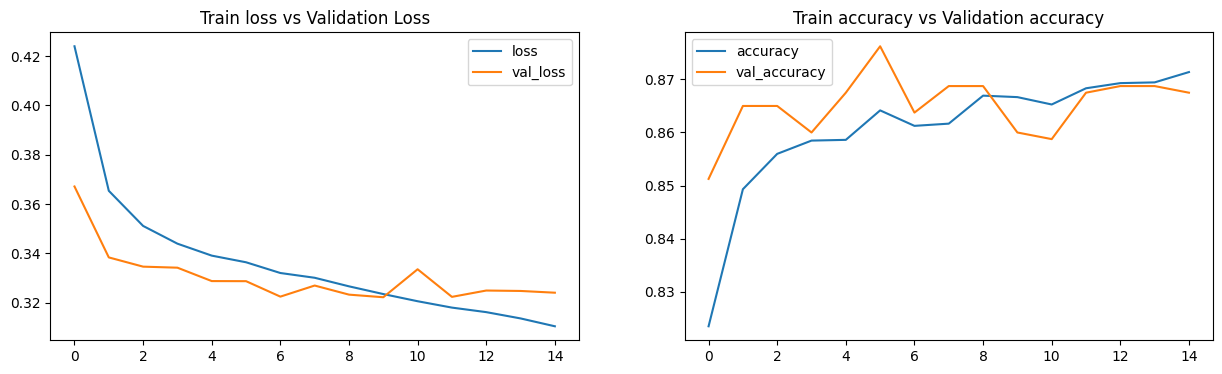

In [116]:
plotModelHistory(history)

In [117]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (10, 12)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (10, 64)               │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (10, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (10, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,173 (59.27 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,116 (39.52 KB)

Evaluate the model

In [118]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8672 - loss: 0.3359


[0.34318801760673523, 0.8654999732971191]

In [119]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [120]:
y_pred

array([[0.2741856 ],
       [0.28575414],
       [0.09285951],
       ...,
       [0.19611049],
       [0.17438531],
       [0.10970956]], dtype=float32)

In [121]:
# check if they are gratter than 0.5
y_pred > 0.5

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

convert to 0s and 1s

In [122]:
# Convert true/false into 1/0
y_pred = (y_pred > 0.5) * 1
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [123]:
y_pred = y_pred.ravel()
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [125]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1516,   79],
       [ 190,  215]])

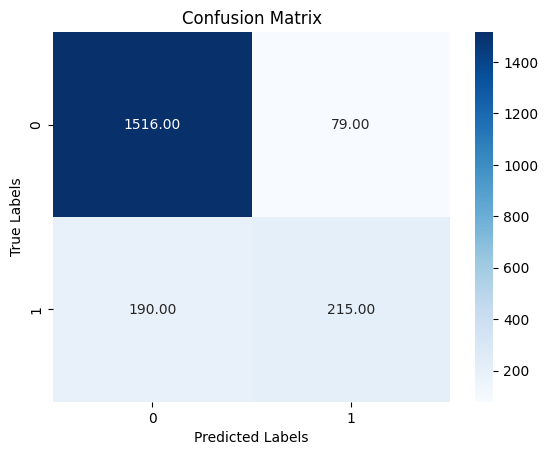

In [126]:


sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.title('Confusion Matrix')

plt.show()

Our model is not good at predicting customer that are likely to go

## Make Model prediction

### Task B

1. Use the built ANN model to predict if the customer with the following information will 
leave the bank:

- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years
- Tenure: 3 years
- Balance: $60000
- Number of Products: 2
- Does this customer have a credit card? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $50000

So, should we let the customer go?


In [134]:
## make prediction

input_user_data = [[600, 1, 40, 3, 60000, 2, 1, 1, 50000, 1, 0, 0]] # In matrix form

# standard_scaler.transform([ [600, 1, 40, 3, 60000, 2, 1, 1, 50000, 1, 0, 0]])
transformed_input  = scaler.transform(input_user_data) 

predictions = model.predict(transformed_input)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/opt/anaconda3/envs/ipykernel_py3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.0410976]], dtype=float32)

In [136]:
score = tf.nn.softmax(predictions[0])

score

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

In [137]:
print(
    "This customer most likely belongs to {} with a {:.2f} percent confidence."
    .format(np.argmax(score), 100 * np.max(score))
)

This customer most likely belongs to 0 with a 100.00 percent confidence.


Our model is predicting this customer is not likely to go.